# Homework 1: Testing Hypotheses



**Recommended Readings**: 

* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)
* [A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Vaccinations Across The Nation

A vaccination clinic has two types of vaccines against a disease. Each person who comes in to be vaccinated gets either Vaccine 1 or Vaccine 2. One week, everyone who came in on Monday, Wednesday, and Friday was given Vaccine 1. Everyone who came in on Tuesday and Thursday was given Vaccine 2. The clinic is closed on weekends.

Doctor DeNero at the clinic said, "Oh wow, the distribution of vaccines is like tossing a coin that lands heads with probability $\frac{3}{5}$. If the coin lands on heads, you get Vaccine 1 and if the coin lands on tails, you get Vaccine 2."

But Doctor Sahai said, "No, it's not. We're not doing anything like tossing a (biased) coin."

That week, the clinic gave Vaccine 1 to 211 people and Vaccine 2 to 107 people. Conduct a test of hypotheses to see which doctor's position is better supported by the data.

**Question 1.1.** Given the information above, what was the sample size for the data, and what was the percentage of people who got **Vaccine 1?**

*Note*: Your percent should be a number between 0 and 100, not a proportion between 0 and 1.


In [1]:
sample_size = 211 + 107
percent_V1 = 211/sample_size

print(f"Sample Size: {sample_size}")
print(f"Vaccine 1 Percent: {percent_V1}")

Sample Size: 318
Vaccine 1 Percent: 0.6635220125786163


<!-- BEGIN QUESTION -->

**Question 1.2.** State the null hypothesis. It should reflect the position of either Dr. DeNero or Dr. Sahai.

*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.


$H_0$: The distribution of vaccines is like tossing a coin that lands heads with Vaccine 1 probability $\frac{3}{5}$.



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 1.3.** State the alternative hypothesis. It should reflect the position of the doctor you did not choose to represent in Question 1.2.

*Note:* Check out [11.3](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#step-1-the-hypotheses) for a refresher on hypotheses.


$H_A$: We're not doing anything like tossing a (biased) coin.

<!-- END QUESTION -->

**Question 1.4.** One of the test statistics below is appropriate for testing these hypotheses. Assign the variable `valid_test_stat` to the number corresponding to the correct test statistic.

_Hint:_ Recall that large values of the test statistic should favor the alternative hypothesis.

1. percent of heads - 60
2. |percent of heads - 60|
3. percent of heads - 50
4. |percent of heads - 50|


In [ ]:
valid_test_stat = percent_V1 - 60
valid_test_stat

In [ ]:
valid_test_stat = np.abs(percent_V1 - 60)
valid_test_stat

In [24]:
def one_simulated_statistic():
    # 318 people 
    # null hypothesis Vaccine1: p = 3/5
    simulated = np.random.choice([1, 0], size=sample_size, p=[0.6, 0.4])
    percent_v1 = simulated.mean() * 100

    return percent_v1
    

In [28]:
one_simulated_statistic()

np.float64(58.490566037735846)

In [31]:
v1_simulation = []
for i in range(20_000):
    v1_proportion_simulated = one_simulated_statistic()
    v1_simulation.append(v1_proportion_simulated)

(array([3.000e+00, 5.600e+01, 5.870e+02, 2.356e+03, 5.837e+03, 6.740e+03,
        3.303e+03, 9.910e+02, 1.200e+02, 7.000e+00]),
 array([47.48427673, 49.90566038, 52.32704403, 54.74842767, 57.16981132,
        59.59119497, 62.01257862, 64.43396226, 66.85534591, 69.27672956,
        71.69811321]),
 <BarContainer object of 10 artists>)

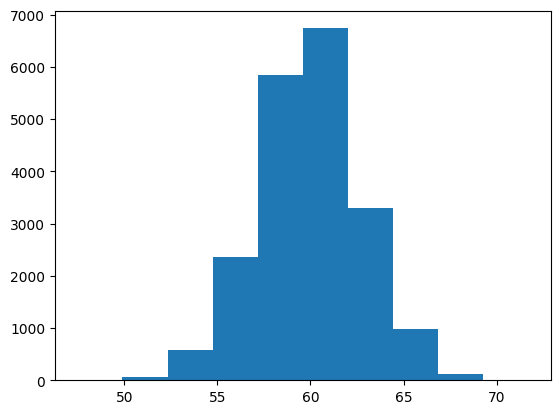

In [33]:
plt.hist(v1_simulation)

**Question 1.5.** Using your answer from Questions 1.1 and 1.4, find the observed value of the test statistic and assign it to the variable `observed_statistic`. Recall that the observed statistic is the test statistic value that was observed in the real life data.


In [37]:
observed_statistic = 100*211/318 - 60
observed_statistic

6.352201257861637

In [38]:
observed_statistic = np.abs(100*211/318 - 60)
observed_statistic

np.float64(6.352201257861637)

**Question 1.6.** In order to perform this hypothesis test, you must simulate the test statistic. From the four options below, pick the assumption that is needed for this simulation. Assign `assumption_needed` to an integer corresponding to the assumption.

1. The statistic must be simulated under the null hypothesis.
2. The statistic must be simulated under the alternative hypothesis.
3. The statistic must be simulated under both hypotheses.
4. No assumptions are needed. We can just simulate the statistic.


In [39]:
assumption_needed = 1
assumption_needed

1

<!-- BEGIN QUESTION -->

**Question 1.7.** Simulate 20,000 values of the test statistic under the assumption you picked in Question 1.6.

As usual, start by defining a function that simulates one value of the statistic. Your function should use `np.random.choice`. (You may find a variable defined in Question 1.1 useful here!) Then, write a `for` loop to simulate multiple values and collect them in the array `simulated_statistics`.

Use as many lines of code as you need. We have included the code that visualizes the distribution of the simulated values. The red dot represents the observed statistic you found in Question 1.5.


In [40]:
def one_simulated_statistic():
    # 318 people 
    # null hypothesis Vaccine1: p = 3/5
    simulated = np.random.choice([1, 0], size=sample_size, p=[0.6, 0.4])
    tvd = np.abs(simulated.mean() * 100 - 60)

    return tvd


<!-- END QUESTION -->



In [44]:
# Run the this cell a few times to see how the simulated statistic changes
one_simulated_statistic()

np.float64(5.094339622641513)

In [45]:

num_simulations = 20000

simulated_statistics = []
for i in np.arange(num_simulations):
    simulated_statistics = np.append(simulated_statistics, one_simulated_statistic())


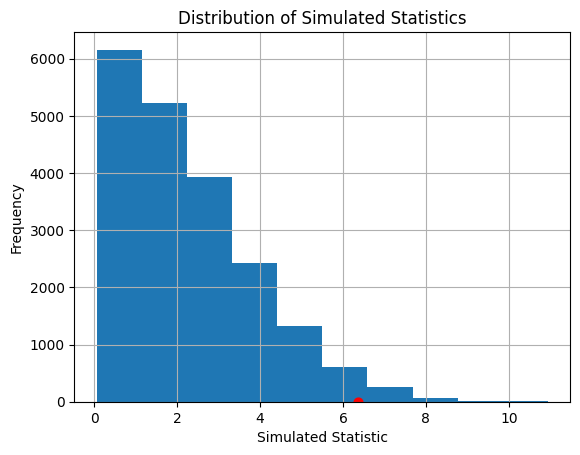

In [48]:
# Run this cell to produce a histogram of the simulated statistics

df = pd.DataFrame({'Simulated Statistic': simulated_statistics})
ax = df['Simulated Statistic'].hist()
plt.scatter(observed_statistic, -0.002, color='red', s=40)
plt.xlabel('Simulated Statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Statistics')
plt.show()

**Question 1.8.** Using `simulated_statistics`, `observed_statistic`, and `num_simulations`, find the empirical p-value based on the simulation.
_Hint:_ Reading [11.3.6](https://inferentialthinking.com/chapters/11/3/Decisions_and_Uncertainty.html#the-meaning-of-consistent) might be helpful for this question.


In [50]:
p_value = np.count_nonzero(simulated_statistics>=observed_statistic)/num_simulations
p_value

0.02295

**Question 1.9.** Assign `correct_doctor` to the number corresponding to the correct statement below. Use the 5% cutoff for the p-value.

1. The data support Dr. DeNero's position more than they support Dr. Sahai's.
2. The data support Dr. Sahai's position more than they support Dr. DeNero's.

As a reminder, here are the two claims made by Dr. DeNero and Dr. Sahai:
> **Doctor DeNero:** "Oh wow, it's just like tossing a coin that lands heads with chance $\frac{3}{5}$. Heads you get Vaccine 1 and Tails you get Vaccine 2."

>**Doctor Sahai:** "No, it's not. We're not doing anything like tossing a coin."


In [ ]:
correct_doctor = 2
correct_doctor

## 2. Using TVD as a Test Statistic

Before beginning this section, please read [this section](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html#a-new-statistic-the-distance-between-two-distributions) of the textbook on TVD!

**Total variation distance (TVD)** is a special type of test statistic that we use when we want to compare two distributions of *categorical data*. It is often used when we observe that a set of observed proportions/probabilities is different than what we expect under the null model. 

Consider a six-sided die that we roll 6,000 times. If the die is fair, we would expect that each face comes up $\frac{1}{6}$ of the time. By random chance, a fair die won't always result in equal proportions (that is, we won't get exactly 1,000 of each face). However, if we suspect that the die might be unfair based on the data, we can conduct a hypothesis test using TVD to compare the expected [$\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$, $\frac{1}{6}$] distribution to what is actually observed.

In this part of the homework, we'll look at how we can use TVD to determine the effect that different factors have on happiness. 

We will be working with data from the [Gallup World Poll](https://www.gallup.com/analytics/349487/gallup-global-happiness-center.aspx#:~:text=World%20Happiness%20Report&text=Using%20the%20Gallup%20World%20Poll,about%20the%20World%20Happiness%20Report.) that is presented in the World Happiness Report, a survey of the state of global happiness. The survey ranked 137 countries by overall happiness and estimated the influence that economic production, social support, life expectancy, freedom, absence of corruption, and generosity had on population happiness. The study has been repeated for several years, but we'll be looking at data from the 2023 survey.

Run the cell below to load in the `happiness_scores` table.

In [ ]:
import pandas as pd
happiness_scores = pd.read_csv("happiness_scores.csv")
happiness_scores = happiness_scores.drop(happiness_scores.columns[[12, 13, 14]], axis=1)
happiness_scores = happiness_scores.iloc[:137]
happiness_scores.head(5)

Participants in the study were asked to evaluate their life satisfaction from a scale of 0 (worst possible life) to 10 (best possible life). The responses for each country were averaged to create the `Happiness Score`.

The columns `Economy (Log GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Generosity`, and `Trust (Government Corruption)` estimate the extent to which each factor influences happiness, both for better or for worse. The happiness score is the sum of these factors; the larger a factor is, the more it contributes to overall happiness. [In other words, if you add up all the factors (in addition to a "Difference from Dystopia" value we excluded in the dataset), you get the happiness score.]

Let's look at the different factors that affect happiness in the United States. Run the cell below to view the row in `us_happiness` that contains data for the United States.

In [ ]:
us_happiness = happiness_scores.loc[happiness_scores['Country']=='United States']
us_happiness

**To compare the different factors, we'll look at the proportion of the happiness score that is attributed to each variable. 
You can find these proportions in the table `us_happiness_factors` after running the cell below.**

*Note:* The factors shown in `us_happiness` don't add up exactly to the happiness score, so we adjusted the proportions to  only account for the data we have access to. The proportions were found by dividing each Happiness Factor value by the sum of all Happiness Factor values in `us_happiness`.

In [ ]:
us_happiness_factors = pd.read_csv("us_happiness_factors.csv")
us_happiness_factors

**Question 2.1.** Suppose we want to test whether or not each factor contributes the same amount to the overall Happiness Score. Define the null hypothesis, alternative hypothesis, and test statistic in the cell below.

*Note:* Please format your answer as follows:
- Null Hypothesis: ...  
- Alternative Hypothesis: ...  
- Test Statistic: ...  


_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 2.2.** Write a function `calculate_tvd` that takes in the observed distribution (`obs_dist`) and expected distribution under the null hypothesis (`null_dist`) and calculates the total variation distance. Use this function to set `observed_tvd` to be equal to the observed test statistic.


In [ ]:
null_distribution = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

def calculate_tvd(obs_dist, null_dist):
    ...
    
observed_tvd = ...
observed_tvd

**Question 2.3.** Create an array called `simulated_tvds` that contains 10,000 simulated values under the null hypothesis. Assume that the original sample consisted of 1,000 individuals.

*Hint:* The `np.random.choice` function may be helpful to you.


In [ ]:
simulated_tvds = ...

...

Run the cell below to plot a histogram of your simulated test statistics, as well as a red dot representing the observed value of the test statistic.

In [ ]:
df = pd.DataFrame({"Simulated TVDs": simulated_tvds})
ax = df["Simulated TVDs"].hist()
plt.scatter(observed_tvd, 0.5, color='red', s=70, zorder=2)
plt.xlabel('Total Variation Distance (TVD)')
plt.ylabel('Frequency')
plt.title('Simulated TVDs')
plt.show()

**Question 2.4.** Use your simulated statistics to calculate the p-value of your test. Make sure that this number is consistent with what you observed in the histogram above.


In [ ]:
p_value_tvd = ...
p_value_tvd

<!-- BEGIN QUESTION -->

**Question 2.5.** What can you conclude about how each factor contributes to the overall happiness score in the US? Explain your answer using the results of your hypothesis test. Assume a p-value cutoff of 5%.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

## 3. Who is Older?

Data scientists have drawn a simple random sample of size 500 from a large population of adults. Each member of the population happened to identify as either "male" or "female". (Though many people identify outside of the gender binary, in this particular population of interest, each member happened to identify as either male or female.) Data was collected on several attributes of the sampled people, including age. The table `sampled_ages` contains one row for each person in the sample, with columns containing the individual's gender identity.

In [ ]:
sampled_ages = pd.read_csv('age.csv')
sampled_ages.head()

**Question 3.1.** How many females were there in our sample? Please use the provided skeleton code.

*Hint:* Keep in mind that `.group` sorts categories in alphabetical order!


In [ ]:
num_females = sampled_ages.group(...)...
num_females

**Question 3.2.** Complete the cell below so that `avg_male_vs_female` evaluates to `True` if the sampled males are older than the sampled females on average, and `False` otherwise. Use Python code to achieve this.

In [ ]:
group_mean_tbl = sampled_ages.groupby(...)
group_means = group_mean_tbl...       # array of mean ages
avg_male_vs_female = group_means... > group_means...
avg_male_vs_female

**Question 3.3.** The data scientists want to use the data to test whether males are older than females—or, in other words, whether the ages of the two groups have the same distribution. One of the following statements is their null hypothesis and another is their alternative hypothesis. Assign `null_statement_number` and `alternative_statement_number` to the numbers of the correct statements in the code cell below.

1. In the sample, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
2. In the population, the males and females have the same distribution of ages; the sample averages of the two groups are different due to chance.
3. The age distributions of males and females in the population are different due to chance.
4. The males in the sample are older than the females, on average.
5. The males in the population are older than the females, on average.
6. The average ages of the males and females in the population are different.


In [ ]:
null_statement_number = ...
alternative_statement_number = ...

**Question 3.4.** The data scientists have decided to use a permutation test. Assign `permutation_test_reason` to the number corresponding to the reason they made this choice.

1. Since a person's age shouldn't be related to their gender, it doesn't matter who is labeled "male" and who is labeled "female", so you can use permutations.
2. Under the null hypothesis, permuting the labels in the `sampled_ages` table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.
3. Under the null hypothesis, permuting the rows of `sampled_ages` table is equivalent to drawing a new random sample with the same number of males and females as in the original sample.

*Note:* Check out [12.1](https://inferentialthinking.com/chapters/12/1/AB_Testing.html#permutation-test) for a refresher on random permutations and permutation tests.


In [ ]:
permutation_test_reason = ...
permutation_test_reason

**Question 3.5.** To test their hypotheses, the data scientists have followed our textbook's advice and chosen a test statistic where the following statement is true: Large values of the test statistic favor the alternative hypothesis.

The data scientists' test statistic is one of the two options below. Which one is it? Assign the appropriate number to the variable `correct_test_stat`.

1. "male age average - female age average" in a sample created by randomly shuffling the male/female labels
2. "|male age average - female age average|" in a sample created by randomly shuffling the male/female labels


In [ ]:
correct_test_stat = ...
correct_test_stat

**Question 3.6.** Complete the cell below so that `observed_statistic_ab` evaluates to the observed value of the data scientists' test statistic. Use as many lines of code as you need, and remember that you can use any quantity, table, or array that you created earlier.


In [ ]:
observed_statistic_ab = ...
observed_statistic_ab

**Question 3.7.** Assign `shuffled_labels` to an array of shuffled male/female labels. The rest of the code puts the array in a table along with the data in `sampled_ages`.


In [ ]:
shuffled_labels = ...
original_with_shuffled_labels = sampled_ages.copy()
original_with_shuffled_labels['Shuffled Label'] = shuffled_labels
original_with_shuffled_labels

**Question 3.8.** The comparison below uses the array `shuffled_labels` from Question 3.7 and the count `num_females` from Question 3.1.

For this comparison, assign the correct letter as a string (e.g. `correct_q8 = 'A'`) from one of the following options to the variable `correct_q8`. **Pretend this is a test problem and do not solve it using a code cell.**

`comp = np.count_nonzero(shuffled_labels == 'female') == num_females`

A. `comp` is set to `True`.<br>
B. `comp` is set to `False`.<br>
C. `comp` is set to `True` or `False`, depending on how the shuffle came out.


In [ ]:
correct_q8 = ...
correct_q8

**Question 3.9.** Define a function `simulate_one_statistic` that takes no arguments and returns one simulated value of the test statistic. We've given you a skeleton, but feel free to approach this question in a way that makes sense to you. Use as many lines of code as you need. Refer to the code you have previously written in this problem, as you might be able to re-use some of it.


In [ ]:
def simulate_one_statistic():
    "Returns one value of our simulated test statistic"
    shuffled_labels = ...
    shuffled_tbl = ...
    group_means = ...
    ...

After you have defined your function, run the following cell a few times to see how the statistic varies.

In [ ]:
simulate_one_statistic()

**Question 3.10.** Complete the cell to simulate 5,000 values of the statistic. We have included the code that draws the empirical distribution of the statistic and shows the value of `observed_statistic_ab` from Question 3.6. Feel free to use as many lines of code as you need.

*Note:* This cell will take around a minute to run.


In [ ]:
simulated_statistics_ab = []

...
    simulated_statistics_ab = ...

# Do not change these lines
df = pd.DataFrame({'Simulated Statistic': simulated_statistics_ab})
ax = df['Simulated Statistic'].hist()
plt.scatter(observed_statistic_ab, -0.002, color='red', s=70)
plt.xlabel('Simulated Statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Statistics')
plt.show()

**Question 3.11.** Use the simulation to find an empirical approximation to the p-value. Assign `p_val` to the appropriate p-value from this simulation. Then, assign `conclusion` to either `null_hyp` or `alt_hyp`.

*Note:* Assume that we use the 5% cutoff for the p-value.


In [ ]:
# These are variables provided for you to use.
null_hyp = 'The data are consistent with the null hypothesis.'
alt_hyp = 'The data support the alternative more than the null.'

p_val = ...
conclusion = ...

p_val, conclusion # Do not change this line